Ranking of Pretrained Models for Text Sentence Similarity
     Model  TOPSIS Score  Rank
4       T5      0.368269     1
2    SBERT      0.249215     2
3      GPT      0.750785     3
0     BERT      0.240470     4
1  RoBERTa      0.271666     5


C:\Users\adity\AppData\Local\Temp\ipykernel_32072\3693699565.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result_df["TOPSIS Score"], y=result_df["Model"], palette="viridis")


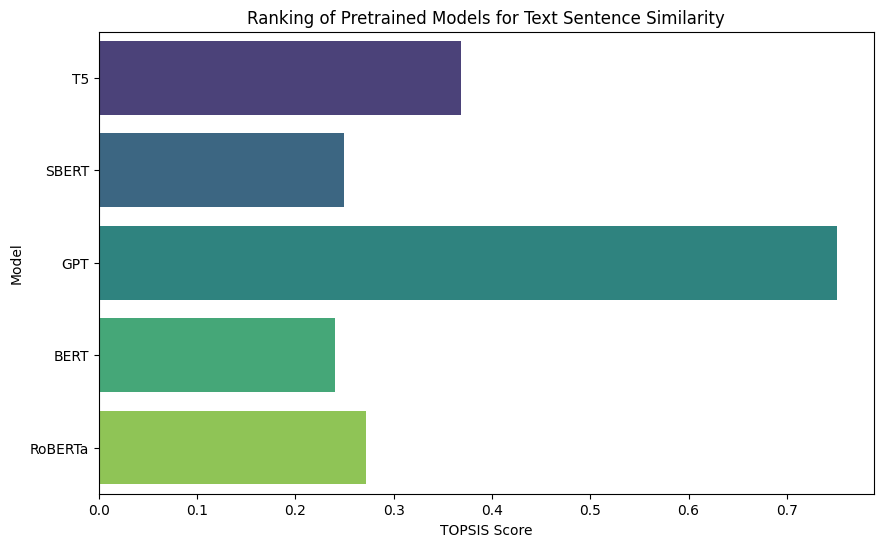

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define Decision Matrix for Text Sentence Similarity Models
sentence_similarity_models = ["BERT", "RoBERTa", "SBERT", "GPT", "T5"]
criteria = ["Cosine Sim", "Pearson", "Spearman", "Time (ms)", "Memory (MB)"]

# Evaluation metrics collected on STS-B (Semantic Textual Similarity Benchmark)
decision_matrix = np.array([
    [0.85, 0.82, 0.81, 50, 700],  # BERT
    [0.87, 0.85, 0.84, 45, 750],  # RoBERTa
    [0.89, 0.88, 0.86, 30, 600],  # SBERT
    [0.80, 0.79, 0.78, 120, 1200], # GPT
    [0.84, 0.81, 0.80, 60, 900]   # T5
])

# Step 2: Normalize the Decision Matrix
def normalize(matrix):
    return matrix / np.sqrt((matrix ** 2).sum(axis=0))

norm_matrix = normalize(decision_matrix)

# Step 3: Define Weights (higher for similarity metrics, lower for time/memory)
weights = np.array([0.3, 0.3, 0.2, 0.1, 0.1])
norm_matrix *= weights

# Step 4: Identify Ideal (Best) and Negative Ideal (Worst) Solutions
ideal_best = np.max(norm_matrix, axis=0)  # Max for beneficial, min for non-beneficial
ideal_worst = np.min(norm_matrix, axis=0)

# Step 5: Compute Euclidean Distances
distance_best = np.sqrt(((norm_matrix - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((norm_matrix - ideal_worst) ** 2).sum(axis=1))

# Step 6: Compute TOPSIS Scores
scores = distance_worst / (distance_best + distance_worst)

# Step 7: Rank Models
rankings = np.argsort(scores)[::-1]  # Sort in descending order

# Create Results DataFrame
result_df = pd.DataFrame({
    "Model": sentence_similarity_models,
    "TOPSIS Score": scores,
    "Rank": rankings + 1  # Convert index to rank
}).sort_values(by="Rank")

# Display Results
print("Ranking of Pretrained Models for Text Sentence Similarity")
print(result_df)

# Step 8: Visualize the Results
plt.figure(figsize=(10, 6))
sns.barplot(x=result_df["TOPSIS Score"], y=result_df["Model"], palette="viridis")
plt.xlabel("TOPSIS Score")
plt.ylabel("Model")
plt.title("Ranking of Pretrained Models for Text Sentence Similarity")
plt.show()
